In [4]:
import pandas as pd
import numpy as np
import seaborn as sns   # 시각화 라이브러리

## 5. Summarize Data

In [54]:
df = sns.load_dataset('iris')
df.shape   # (행, 열)

(150, 5)

In [55]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [56]:
df['species'].value_counts()   # 항목별 개수 카운트

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [57]:
pd.DataFrame(df['species'].value_counts())   # dataframe 형태로

,species
virginica,50
setosa,50
versicolor,50


In [58]:
df['species'].nunique()   # 중복되지 않은 항목의 개수

3

In [59]:
df.describe()   # 수치형 데이터만 표시

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
df.describe(include = 'all')   # top: top frequency를 갖는 항목

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [61]:
df.describe(include=[np.object])  # object type만 표시

,species
count,150
unique,3
top,virginica
freq,50


In [62]:
df.describe(include=[np.number])   # number type만 표시

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


df.sum() : 각 항목의 합  
df.count() : 각 항목의 개수 (non-NA/null)  
df.median() : 각 항목의 최빈값  
df.quantile() : 각 항목의 사분위수 (df.quantile([0.25,0.75])형태로 지정 가능)  
df.min() : 각 항목의 최솟값  
df.max() : 각 항목의 최댓값  
df.mean() : 각 항목의 평균  
df.var() : 각 항목의 분산  
df.std() : 각 항목의 표준편차  
apply(_function_) : 각 항목에 함수를 적용  

### apply(_function_)

In [63]:
df.apply(lambda x : x[1])   # 임의의 함수

sepal_length       4.9
sepal_width          3
petal_length       1.4
petal_width        0.2
species         setosa
dtype: object

In [64]:
df['species_3'] = df['species'].apply(lambda x : x[:3])
    # species열에서 첫 3글자 추출 후 species_3 열에 추가
df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_3
147,6.5,3.0,5.2,2.0,virginica,vir
148,6.2,3.4,5.4,2.3,virginica,vir
149,5.9,3.0,5.1,1.8,virginica,vir


In [65]:
def smp(x):
    # 뒤에서부터 세번째까지 문자 추출
    x = x[:-3]
    return x

df['species_3_b'] = df['species'].apply(smp)   # 함수 적용
df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_3,species_3_b
147,6.5,3.0,5.2,2.0,virginica,vir,virgin
148,6.2,3.4,5.4,2.3,virginica,vir,virgin
149,5.9,3.0,5.1,1.8,virginica,vir,virgin


## 6. Handling Missing Data

df.dropna(axis=0) : NA/null이 들어있는 행 전체 삭제  
df.dropna(axis=1) : NA/null이 들어있는 열 전체 삭제  
df[ ].dropna() : NA/null 들어있는 특정 행 또는 열을 삭제  
df.fillna(value) : 모든 NA/null에 값 대체  

## 7. Make New Columns

In [66]:
df = pd.DataFrame({'A':range(1,6),'B':np.random.randn(5)})
df

,A,B
0,1,0.989189
1,2,-0.341036
2,3,-0.294497
3,4,2.668057
4,5,0.759853


In [67]:
df.assign(Area = lambda df: df.A * df.B)

,A,B,Area
0,1,0.989189,0.989189
1,2,-0.341036,-0.682072
2,3,-0.294497,-0.883491
3,4,2.668057,10.672227
4,5,0.759853,3.799263


In [68]:
df.assign(ln_A = lambda x: np.log(x.A))

,A,B,ln_A
0,1,0.989189,0.000000
1,2,-0.341036,0.693147
2,3,-0.294497,1.098612
3,4,2.668057,1.386294
4,5,0.759853,1.609438


In [69]:
df['ln_A'] = np.log(df.A)   # 혹은 df.ln_A = np.log(df.A)
df

,A,B,ln_A
0,1,0.989189,0.000000
1,2,-0.341036,0.693147
2,3,-0.294497,1.098612
3,4,2.668057,1.386294
4,5,0.759853,1.609438


In [70]:
pd.qcut(df.A, 3, labels = ["good", "medium", "bad"])
    # 숫자형을 카테고리형 데이터로 변환
    # 지정한 수 만큼 자동으로 나눠 분류

0      good
1      good
2    medium
3       bad
4       bad
Name: A, dtype: category
Categories (3, object): ['good' < 'medium' < 'bad']

In [71]:
pd.qcut(df.B, 2, labels = ["good", "bad"])

0     bad
1    good
2    good
3     bad
4    good
Name: B, dtype: category
Categories (2, object): ['good' < 'bad']

In [72]:
df.min(axis = 0)   # 열별 최솟값

A       1.000000
B      -0.341036
ln_A    0.000000
dtype: float64

In [73]:
df.min(axis=1)   # 행별 최솟값

0    0.000000
1   -0.341036
2   -0.294497
3    1.386294
4    0.759853
dtype: float64

In [74]:
df['A'].clip(lower = 3, upper = 8)
    # 임계치 지정
    # 최솟값은 lower로, 최댓값은 upper로 대체

0    3
1    3
2    3
3    4
4    5
Name: A, dtype: int64

In [75]:
df['B'].abs()   # 절댓값

0    0.989189
1    0.341036
2    0.294497
3    2.668057
4    0.759853
Name: B, dtype: float64

## 8. Group Data

In [86]:
df = sns.load_dataset('iris')

group = df.groupby(by = 'species')
group

df.groupby(level='ind') :  groupby object를 반환. 'ind'란 이름의 index 값들을 grouping  

In [88]:
group.size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [90]:
group.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


shift(1) : 행을 하나씩 아래로  
shift(-1) : 행을 하나씩 위로

동점 데이터의 순위 결정:  
rank(method = 'min') : 동점 관측치에 그룹 내 최소 순위 부여  
rank(method = 'dense') : 'min'과 같은 방법으로 순위부여. 단 그룹 간 순위가 1씩 증가  
rank(method = 'first') : 그룹에서 표시되는 순서대로 순위 부여  
rank(pct = True) : 반환된 순위를 백분위 수 형식으로 표시  

In [8]:
df = pd.DataFrame({'name': ['KIM', 'KANG', 'YANG','YOON', 'LEE'],
                   'age': [24, 32, 43, 24, np.nan]})

df['rank_average'] = df['age'].rank(method='average')
df['rank_min'] = df['age'].rank(method='min')
df['rank_max'] = df['age'].rank(method='max')
df['rank_first'] = df['age'].rank(method='first')
df['rank_dense'] = df['age'].rank(method='dense')
df

,name,age,rank_average,rank_min,rank_max,rank_first,rank_dense
0,KIM,24.0,1.5,1.0,2.0,1.0,1.0
1,KANG,32.0,3.0,3.0,3.0,3.0,2.0
2,YANG,43.0,4.0,4.0,4.0,4.0,3.0
3,YOON,24.0,1.5,1.0,2.0,2.0,1.0
4,LEE,NaN,NaN,NaN,NaN,NaN,NaN


cumsum() : 누적합  
cummax() : 누적 최댓값  
cummin() : 누적 최솟값  
cumprod() : 누적 곱

In [18]:
df = pd.DataFrame([[1,2,3],[4,5,6]],columns = ['A','B','C'])
df

,A,B,C
0,1,2,3
1,4,5,6


In [19]:
df.cumprod()
    # 1 * 4, 2 * 5, 3 * 6

,A,B,C
0,1,2,3
1,4,10,18


In [22]:
df.cumprod(axis=1)
    # 1 * 2 * 3
    # 4 * 5 * 6

,A,B,C
0,1,2,6
1,4,20,120


### agg(_function_)

In [48]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [92]:
df.agg(['sum', 'min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


In [93]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
max,NaN,8.0
min,1.0,2.0
sum,12.0,NaN


In [94]:
df.agg(x=('A', max), y=('B', 'min'), z=('C', np.mean))

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,6.0


In [95]:
df.agg("mean", axis="columns")

0    2.0
1    5.0
2    8.0
3    NaN
dtype: float64

## 8. Windows & Plotting

### Windows

In [29]:
df = pd.DataFrame({"B": [0, 1, 2, np.nan, 4]})
df

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


In [41]:
df.expanding(min_periods = 2,
             axis = 0).sum()
    # provide expanding transformations.
    # 2개의 관측치 보일 때까지는 NaN 반환
    # 이후로 sum을 적용

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


In [45]:
df.rolling(window = 2,
           min_periods = None, 
           center = False,
           win_type = None,
           on = None,
           axis = 0,
           closed = None
          ).sum()
    # provide rolling window calculations.
    # 2개씩 건너뛰며 sum을 적용  

,B
0,NaN
1,1.0
2,3.0
3,NaN
4,NaN


### Plotting

In [53]:
df = pd.DataFrame({'A': np.random.randn(1000)+1,
                   'B': np.random.randn(1000),
                   'C': np.random.randn(1000)-1},
                 columns = ['A','B','C'])
df.head(3)

,A,B,C
0,1.641035,-0.116209,-0.279715
1,0.975435,-0.874098,-1.965071
2,-0.652109,0.714793,-1.649675


<AxesSubplot:ylabel='Frequency'>

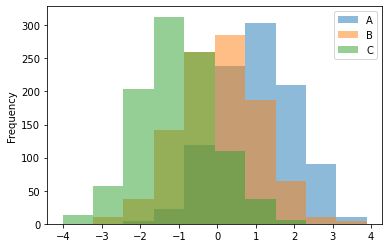

In [57]:
df.plot.hist(alpha = 0.5)   # alpha: 투명도

<AxesSubplot:ylabel='Frequency'>

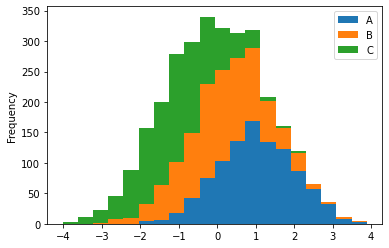

In [58]:
df.plot.hist(stacked=True, bins=20) # bins : 막대개수, bin따라 freq도 바뀜

<AxesSubplot:xlabel='A', ylabel='B'>

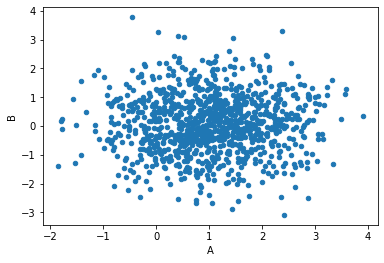

In [61]:
df.plot.scatter(x='A',y='B')